# Project description

**Author:** Cristian Jeraldo, www.asgeominspa.com

**Date:** June 13, 2024

**Description:** This notebook contains the necessary steps to develop an analytical contamination analysis, including the visualization of results and the application of statistical measurement techniques.

# Importing libreries

In [1]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data manipulation
import numpy as np
import pandas as pd

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing data

In [2]:
# Importing data
df = pd.read_csv('contaminación_Cu.csv')

In [3]:
df.head(3)

,SAMPLE_ID,Inserto,Cu,Origen
0,STD HIGH 1,1,0.02,P2022-111 Análisis Estandares MSDv3.xlsx
1,STD HIGH 2,2,0.01,P2022-111 Análisis Estandares MSDv3.xlsx
2,STD HIGH 3,3,0.02,P2022-111 Análisis Estandares MSDv3.xlsx


In [4]:
df.shape

(30, 4)

# Contamination plot

In [5]:
# Axis setting
x = df['Inserto']
y = df['Cu']

In [6]:
# Edit type of control, analyte and laboratory  
control = 'blanco fino' # analítico o de preparación mecánica
analyte = 'Cu (%)'
lab = 'Bureau Veritas Antofagasta, Chile'

In [7]:
# Specification limit
limit = 0.1

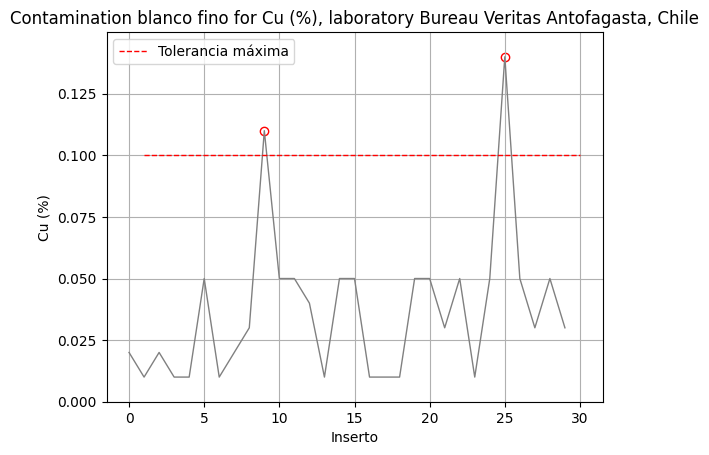

In [8]:
# Contamination plot
fig,ax = plt.subplots()

ax.set_title("Contamination {} for {}, laboratory {}".format(control,analyte,lab))

# Samples result lineplot 
ax.plot(y, color='grey', linewidth=1)

# lineplot edgecolors for errors
for i in range(1,len(y)):
    if y[i] > limit:
        ax.scatter(x[i-1],y[i], edgecolors='red', color='white')
    else:
        ax.scatter(x[i-1],y[i], color='white')       
    
# Control lines       
ax.hlines(y=limit, xmin=1, xmax=len(df), linewidth=1, color='red', linestyles='--', label='Tolerancia máxima')
plt.legend()

# Edit Y axis range (grade) and tick marks
plt.ylim([0.0,0.15])
plt.yticks(np.arange(0.0,0.15,0.025))

# Red dots identification
colors = np.where(y > limit, 'r', 'w')

# Counting points over specification limit (red dots)
num_points_over_limit = np.sum(colors == 'r')

# Grid plot
plt.grid()

# Axis titles
plt.xlabel('Inserto')
plt.ylabel(analyte);

**Comments:**
- Add.       

# Percentage of points over specification limit

In [9]:
# Percentage of fails
fails = num_points_over_limit / len(x) * 100

In [10]:
print("The percentage of fails of {} for {} in laboratory {} is {:.2f}".format(control,analyte,lab,fails))

The percentage of fails of blanco fino for Cu (%) in laboratory Bureau Veritas Antofagasta, Chile is 6.67


**Conclusión:**
- Add.